# Standardization (Z-Score Scaling)
### Standardization is a feature scaling technique that transforms data to have zero mean and unit variance. This makes the features comparable and improves the performance of machine learning models that rely on numerical stability.
# Formula for Standardization
## 𝑋′=𝑋−𝜇/𝜎

​
 
### Where:
### X ′= Standardized value
### 𝑋 = Original feature value
### μ = Mean of the feature
### σ = Standard deviation of the feature



In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [569]:
## Loading Dataset  
df = pd.read_csv('D:\\Programming\\Study\\Machine Learning\\Datasets\\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [570]:
df = df.iloc[:,2:]
## Explanation:
# : (before the comma) → Selects all rows.
# 2: (after the comma) → Selects all columns starting from index 2 (i.e., drops the first two columns).
##df.iloc[:, 2]  # Selects the 3rd column (index 2)


df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train-Test Split

In [571]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard Scaler(Standardization)

In [572]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the Scaler to the train set, it will learn the training set parameters such as mean standard deviation
scaler.fit(X_train)

# Transform train and test set
X_train_scaled = scaler.transform(X_train)# It takes Pandas Dataframe but returns Numpy Array
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Transforming Numpy array into Dataframe
X_train_scaled = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled,columns=X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [574]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [575]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0, 0.5, 'Age')

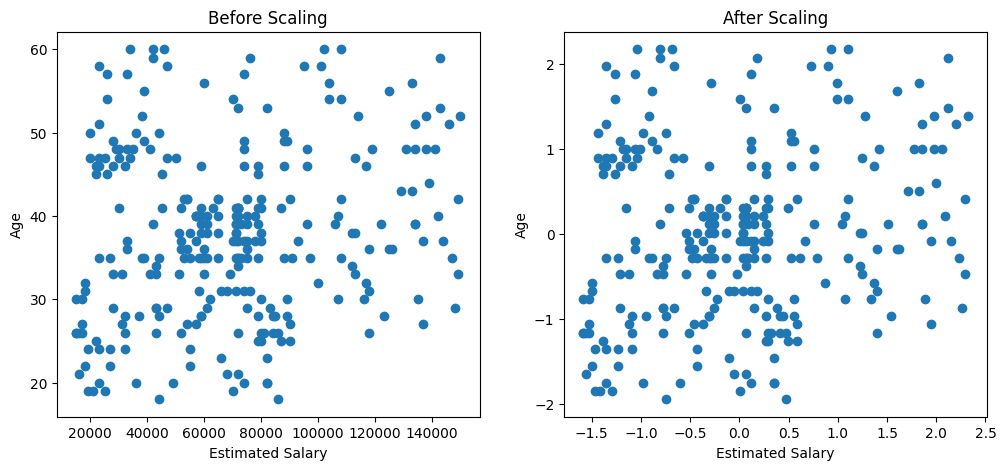

In [576]:
fig,(axis1,axis2) = plt.subplots(ncols = 2,figsize =(12,5))

axis1.scatter(X_train['EstimatedSalary'],X_train['Age'])
axis1.set_title('Before Scaling')
axis1.set_xlabel("Estimated Salary")
axis1.set_ylabel("Age")
axis2.scatter(X_train_scaled['EstimatedSalary'],X_train_scaled['Age'])
axis2.set_title('After Scaling')
axis2.set_xlabel("Estimated Salary")
axis2.set_ylabel("Age")


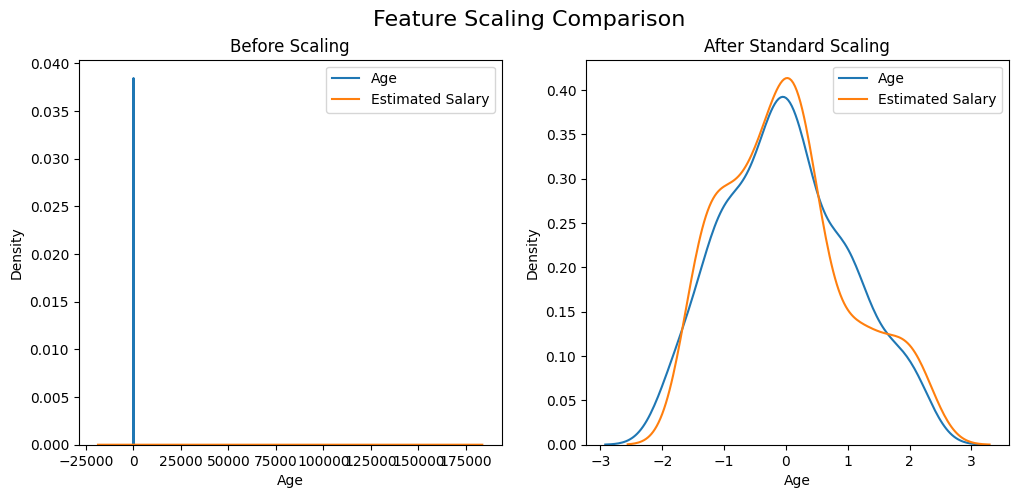

In [577]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='Estimated Salary')
ax1.legend()

# After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='Estimated Salary')
ax2.legend()

# Add figure-level labels
fig.suptitle('Feature Scaling Comparison', fontsize=16)
plt.show()


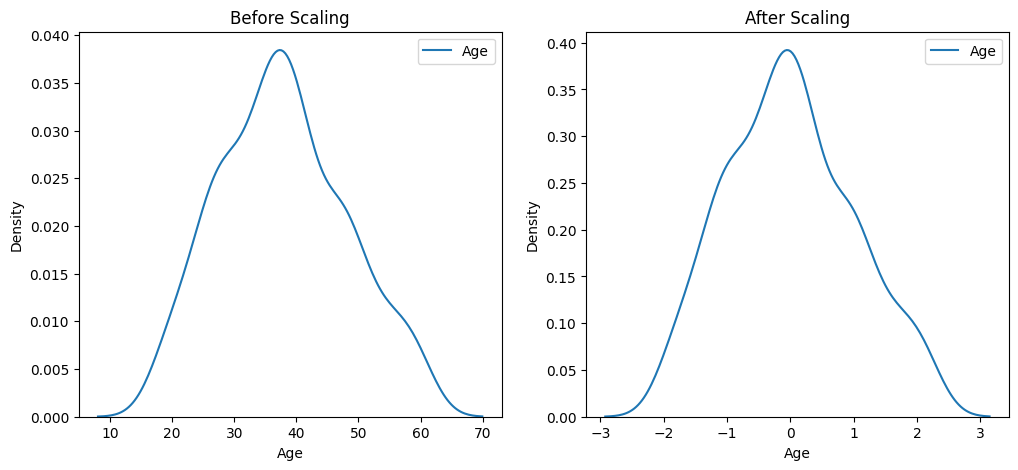

In [578]:
## Plotting distribution of age before and after standardization
fig,(axis1,axis2) = plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=axis1,label = 'Age')
axis1.set_title("Before Scaling")
axis1.set_xlabel('Age')
axis1.legend()

sns.kdeplot(X_train_scaled['Age'],ax=axis2,label = 'Age')
axis2.set_title("After Scaling")
axis2.set_xlabel('Age')
axis2.legend()
plt.show()
## We can see that distribution of age is still same but the scale of Age has been changed

# Why Scaling is Important

In [579]:
from sklearn.linear_model import LogisticRegression

logistic_normal = LogisticRegression(n_jobs=1)
logistic_scaled = LogisticRegression(n_jobs=1, class_weight='balanced')

logistic_normal.fit(X_train,Y_train)
logistic_scaled.fit(X_train_scaled,Y_train)

LogisticRegression(class_weight='balanced', n_jobs=1)

In [580]:
y_predict_normal = logistic_normal.predict(X_test)
y_predict_scaled = logistic_scaled.predict(X_test_scaled)

In [581]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of Actual Data: {accuracy_score(Y_test,y_predict_normal)}')
print(f'Accuracy of Scaled Data: {accuracy_score(Y_test,y_predict_scaled)}')

Accuracy of Actual Data: 0.875
Accuracy of Scaled Data: 0.8833333333333333


# Effect of Outliers


In [582]:
df = df._append(pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,250000,350000],"Purchased":[0,1,1]}))
df.reset_index(drop=True,inplace=True)
df.head(409)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


Text(0, 0.5, 'Age')

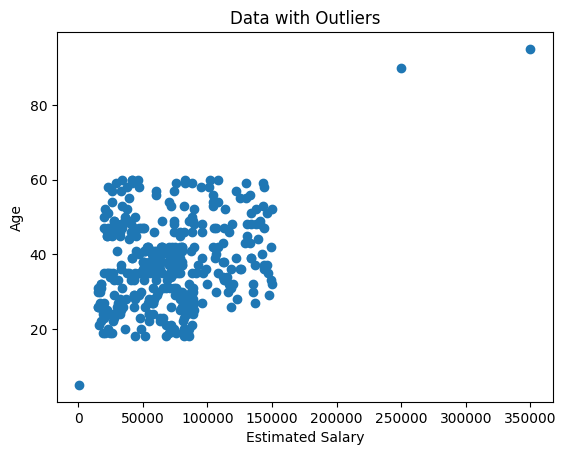

In [583]:
plt.scatter(x=df["EstimatedSalary"],y=df["Age"])
plt.title("Data with Outliers")
plt.xlabel("Estimated Salary")
plt.ylabel("Age")

In [584]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((282, 2), (121, 2))

In [585]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the Scaler to the train set, it will learn the training set parameters such as mean standard deviation
scaler.fit(X_train)

# Transform train and test set
X_train_scaled = scaler.transform(X_train)# It takes Pandas Dataframe but returns Numpy Array
X_test_scaled = scaler.transform(X_test)


In [586]:
X_train_scaled = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled,columns=X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


Text(0, 0.5, 'Age')

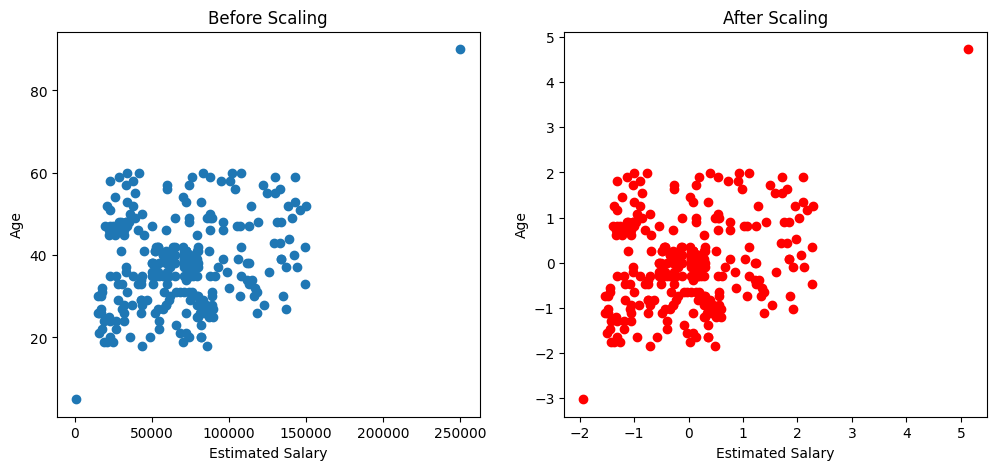

In [587]:
fig,(axis1,axis2) = plt.subplots(ncols = 2,figsize =(12,5))

axis1.scatter(X_train['EstimatedSalary'],X_train['Age'])
axis1.set_title('Before Scaling')
axis1.set_xlabel("Estimated Salary")
axis1.set_ylabel("Age")
axis2.scatter(X_train_scaled['EstimatedSalary'],X_train_scaled['Age'],color='red')
axis2.set_title('After Scaling')
axis2.set_xlabel("Estimated Salary")
axis2.set_ylabel("Age")

#### So as we can see standardization is not able to reduce the affect of Outliers so standardization is not good with outliers

### When to Use Standardization vs. Normalization?
#### Feature Scaling Type	Best For
#### Standardization (Z-Score Scaling)	Logistic Regression, SVM, Neural Networks, PCA
#### Min-Max Scaling (Normalization)	KNN, K-Means, Deep Learning, when features need to be between 0 and 1
#### Robust Scaling	Datasets with many outliers